In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## $\xi = (\xi_{1}, \xi_{2}) \sim 𝑁(𝑎, \Sigma)$, где $a = \begin{pmatrix} 0 \\ 0  \end{pmatrix}, \Sigma = \begin{pmatrix} 10 & 8 \\ 8 & 10 \end{pmatrix}$

## График плотности распределения $\xi = (\xi_{1}, \xi_{2})$

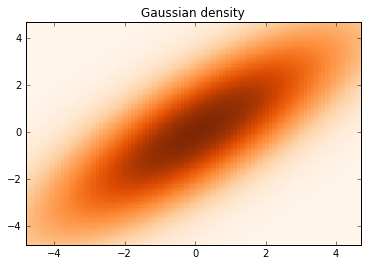

In [2]:
grid = np.mgrid[-5:5:0.1, -5:5:0.1]
density = np.array([[sts.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean=[0, 0], cov=[[10, 8], [8, 10]])
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[0].shape[1])])

plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')  # закрасить с интенсивностью density, cmap - цветовая схема
plt.xlim((np.min(grid[0]) + 0.2, np.max(grid[0]) - 0.2))
plt.ylim((np.min(grid[1]) + 0.2, np.max(grid[1]) - 0.2))
plt.title('Gaussian density')
    
plt.show()

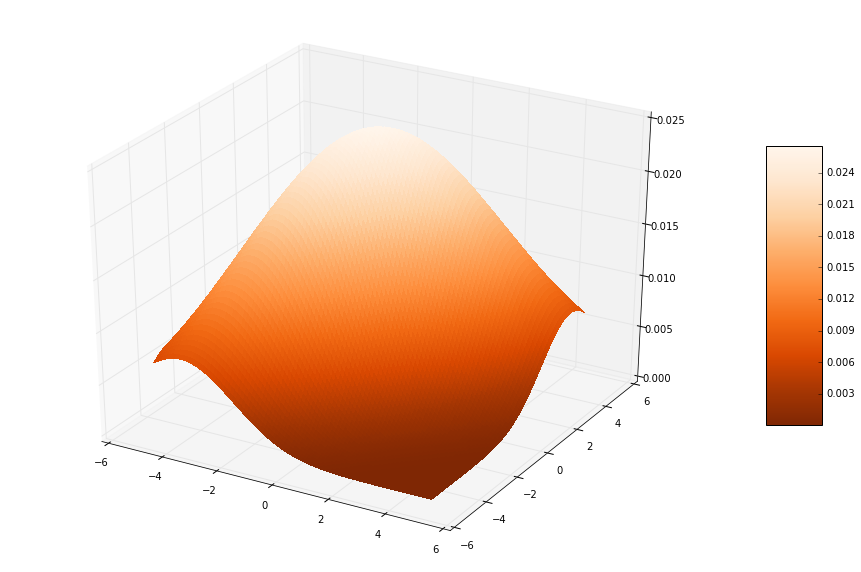

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid[0], grid[1], density, rstride=1, cstride=1, cmap='Oranges_r',
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.025)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## График $f_{\xi_{1}|\xi_{2}}(x|y)$ от $х$

In [4]:
def conditional_density(x, y):
    res = sts.multivariate_normal.pdf((x, y), mean=[0, 0], cov=[[10, 8], [8, 10]])
    res /= sts.norm(0,np.sqrt(10)).pdf(y)
    return res

In [5]:
size = 1000
x = np.linspace(-10, 10, size)
y = np.array([-3, 0, 1, 5])
ones = np.ones_like(x)
density = np.array([])
for j in y:
    density = np.append(density, np.array([conditional_density(x[i], j) for i in range(size)]))
density = np.reshape(density, (y.size, size))

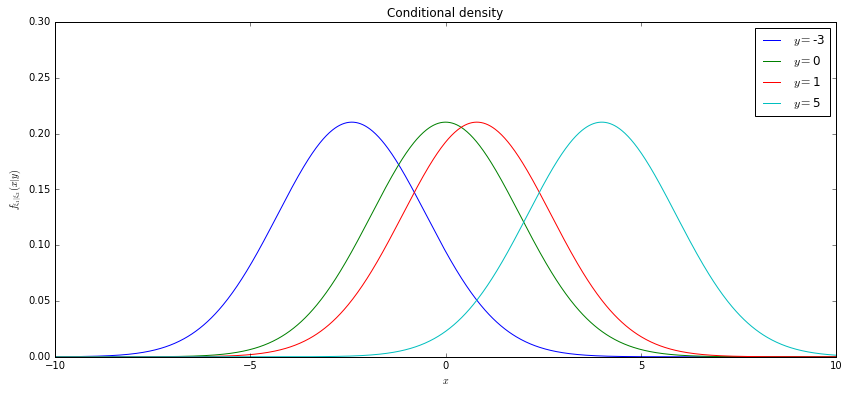

In [6]:
plt.figure(figsize=(14, 6))

plt.axis([-10, 10, 0, 0.3])

for i in xrange(y.size):
    plt.plot(x, density[i], label = '$y =$' + str(y[i]))

plt.ylabel('$f_{\\xi_{1}|\\xi_{2}}(x|y)$')
plt.xlabel('$x$')
plt.title('Conditional density')
plt.legend()

plt.show()

## График $E(\xi_{1}|\xi_{2} = y)$ от $y = {-3, 0, 1, 5}$

In [7]:
from scipy.integrate import quad

# условное матожидание в точках y
conditional_expectation = np.array([])
for i in y:
    value, _ = quad(lambda x: x*conditional_density(x, i), -np.inf , np.inf)
    conditional_expectation = np.append(conditional_expectation, value)

In [8]:
x = np.linspace(-10, 10, 200)

# условное матожидание в точках x
plot_conditional_expectation = np.array([])
for i in x:
    value, _ = quad(lambda z: z*conditional_density(z, i), -np.inf , np.inf)
    plot_conditional_expectation = np.append(plot_conditional_expectation, value)

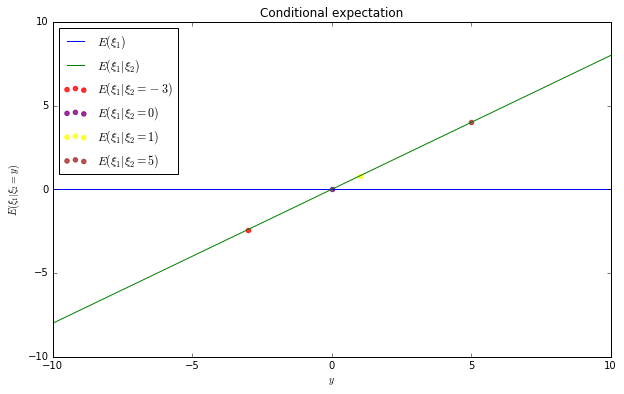

In [9]:
colors = ['red', 'purple', 'yellow', 'brown']

plt.figure(figsize=(10, 6))

for i in xrange(y.size):
    plt.scatter(y[i], conditional_expectation[i], color = colors[i], alpha = 0.8, \
                label = r'$E(\xi_{1}|\xi_{2} = ' + str(y[i]) + ')$')

plt.plot(x, np.zeros_like(x), label = r'$E(\xi_{1})$')
plt.plot(x, plot_conditional_expectation, label = r'$E(\xi_{1}|\xi_{2})$')
plt.xlabel('$y$')
plt.ylabel('$E(\\xi_{1}|\\xi_{2} = y)$')
plt.xlim(-10, 10)
plt.legend(loc = 'upper left')
plt.title('Conditional expectation')

plt.show()